### Assigment 1: Elevator simulation - By Dennis, Luis & Ziquan
###  CS166 - Modeling, Simualtion and Decision Making


#### Table of Contents
* [Overview of Project](#Overview-of-Project)
* [Person Class](#Person-Class)
* [Building Class](#Building-Class)
* [Elevation Class](#Elevation-Class)
* [Strategy 1](#Strategy-1)
* [Strategy 2](#Strategy-1)

<a name="Overview-of-Project"></a>
### Overview of Project

This project aims to create an elevator simulation that enables people to move from one floor to another in a building.

In [1]:
# Here we import all the libraries that we will use for this assigment
import random 
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a name="Strategy-1"></a>
### Strategy 1

<a name="Person-Class"></a>
### Person Class

In [2]:
# This is our Person Class that we build. 

class Person():
    def __init__(self, endingIn = None, startFrom = None, waiting_time = None): # We are initializing all the parameters with "None" such that we can get an error that will specify where we have data missing once we call this class.
        self.startFrom = startFrom #This is our starting floor parameter
        self.endingIn = endingIn #Ending floor parameter
        self.waiting_time = waiting_time # Here is the waiting time for each passenger
        self.transit_status = 0 #This is the transit status of each individual. A person waiting starts with zero, and this changes once they enter the elevator.
    
    def call(self):
        """
        We made a method to get the calling floor for each individual. It tells us which floors are getting called
        """
        return self.startFrom

    
    # This method
    def getIn(self,elevator,building):
        """
        This method gets called by each passenger once the elevator is in their floor. They check if there is enough space for them first, if there is space, they decide to get in.
        """
        if elevator.num_passenger < elevator.total_capacity:
            elevator.num_passenger += 1 # Our elevator get one person in the capacity
            elevator.total_time += elevator.time['Stop'] # Only if the person stops the elevator and gets in, does the elevator open its doors.
            elevator.destination.add(self.endingIn) # The User presses the elevetor button and the elevator stores thier stops
            

            building.floor[self.startFrom].remove(self) # This line of code removes the person from the building list
            elevator.passenger.append(self) # We append the object from the building to the elevator. 

            
    def getOff(self, elevator):
        """
        Method gets called once a person in the elevator wants to get off
        """
        if elevator.curr_floor == self.endingIn: # Here the users checks if their current floor is the one of the elevator. If so, they get off
            elevator.num_passenger -= 1 # The elevator get one less capacity (which means that it has more room now)
            elevator.total_time += elevator.time['Stop'] # The door opens and we add the time of opening hte door.
            
            elevator.waiting_time.append(elevator.total_time) # The person's waiting time is the same as the elevator time when s/he gets off.
            
        
        
        
        
        
        

<a name="Building-Class"></a>
### Building Class

In [3]:
# We initialized the building with three parameters
class Building():
    def __init__(self, total_num_floors = None, num_people = None ): 
        self.total_num_floors = total_num_floors # This is the total number of floors in the building
        self.num_people = num_people # This is the number of people that we will create in our simulation
        self.passengers = [] # List of passengers objects in the building
        self.callingFrom = [] # This is a list that returns the floors where pasangers are calling from  
        self.floor = [] # Here we make a list that stores the object of each passanger in a list showcasing thier floors
        
        for i in range(total_num_floors): #Here we append empty lists to the "floor" parameter. Each floor is initially empty
            self.floor.append([]) 

        self.createPeople() # Here we create people using the in-built method
        for person in self.passengers: # We now append each person into their floors to keep track of them
            self.floor[person.startFrom].append(person)
        self.callElevator() # We assume that all passangers call the elevetor at the start of our simulation
    
    
    # Here we created a method that will create people within the building
    
    def createPeople(self):
        """
        Here we create the Person objects based on the given number of people we want to simulate
        """
        for i in range(self.num_people):
            randomNumbers = random.sample(range(0, self.total_num_floors), 2) # Here we use random sample as it helps us get two unique numbers  
            self.passengers.append(Person(randomNumbers[0],randomNumbers[1],0)) # Here we create new objects of the Person (With random walks). 
            
    def callElevator(self):
        """
        This mehod helps us get all the floor destinations at once
        """
        for person in self.passengers:
            self.callingFrom.append(person.call())
        return self.callingFrom
    



<a name="Elevator-Class"></a>
### Elevator Class

In [4]:
# Here we are creating the elevator class

class Elevator():
    def __init__(self, num_passenger = None, total_time = 0, total_floors = None, moving_one_floor_time = None, 
                 door_time = None, curr_floor = None, direction = None, total_capacity = None): 
        self.total_capacity = 6 # This parameter gives us the maximum number of people in the elevator
        self.num_passenger = 0 # The number of people in the elevator at a given time (We start with zero assuming no one is in the elevator)
        self.total_time = 0 # Here we keep track of the Total time of our simulation
        self.time = {'Move': 5, 'Stop': 4} # We created a set with given times for specific actions
        self.total_floors = total_floors # This parameter helps us get the total building size 
        self.curr_floor = random.randint(0, 20) # Currrent floor (We initialize in random floors each simulation)
        self.direction = direction # Direction of the Elevator -1 and 1. We keep track of this to know where the elevator is currently moving too.
        self.destination = set() #Here we created an empty set with the destinations 
        self.passenger = [] # Here we created a list that stores the passangers in the elevator
        self.waiting_time = []

    def decide(self, elevator, building):
        """
        This is the method to decide where to move the elevator. It will be called whenever we get inot a new floor
        """
        if self.curr_floor in self.destination: # Cases where we need to open the door to let a passanger get out
            for person in self.passenger:
                person.getOff(elevator)
        
        if self.curr_floor in building.callingFrom: # Cases where the elevator needs to check if people want to get in
            for person in building.floor[self.curr_floor]:
                person.getIn(elevator, building)
        
        
        
        if self.curr_floor == building.total_num_floors: #This just checks that the elevtor does not move beyond the building. (e.g. fly into space or move underground)
            self.direction = -1 # If we are at the top of the building, we automatically move down
            self.going_down()
        elif self.curr_floor == 0: # If we are at the bottom, we move up
            self.direction = 1
            self.going_up()
        else: 
            if self.direction == -1: # In the cases where we are neither at the top most or bottom floor, the elevator just takes the same course
                self.going_down()
            else:
                self.going_up()
                
                  
    def going_up(self):
        """
        Method for going up. This method will be called when the elevator wants to go up 
        """
        self.curr_floor += 1
        self.total_time += self.time['Move']
    
    def going_down(self):
        """
        Methods for going down.
        """
        self.curr_floor -= 1
        self.total_time += self.time['Move']
            

### Simulation

In [5]:
# This is the simulation code.

def simulate(building, elevator): # The simulation takes in a specific elevator and building as inputs
        count = 1 #We run this simulation until we no longer have people waiting to finish their trip
        while count > 0 or elevator.num_passenger > 0:
            count = 0 
            for i in range(len(building.floor)): #Every move, the building does an "imaginary" scan to check if people are still waiting in the building
                if len(building.floor[i]) == 1:
                    count += 1
                else:
                    count += 0
            elevator.decide(elevator,building) # If there are people still waiting, we make the elevator with this code

Simulation with different parameters 

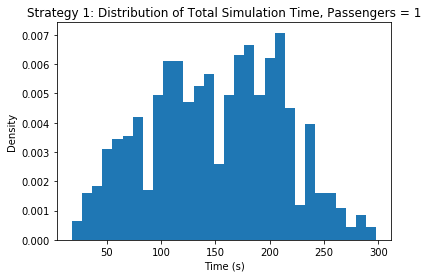

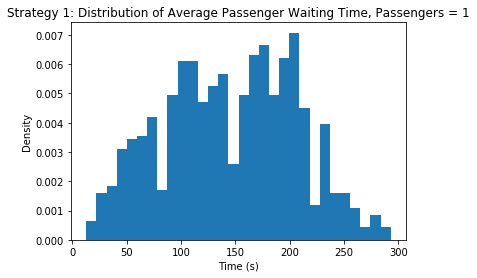

/Users/denniskageni/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/denniskageni/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


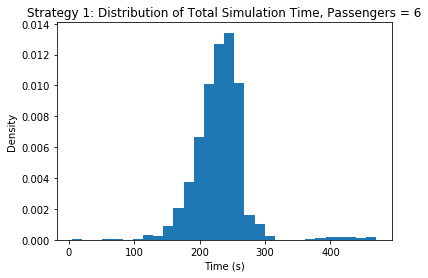

/Users/denniskageni/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/denniskageni/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


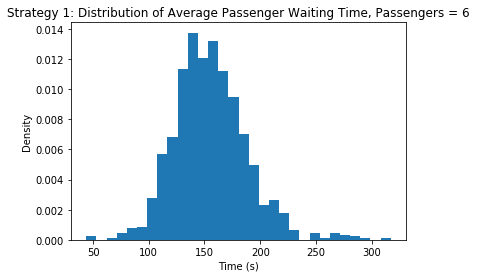

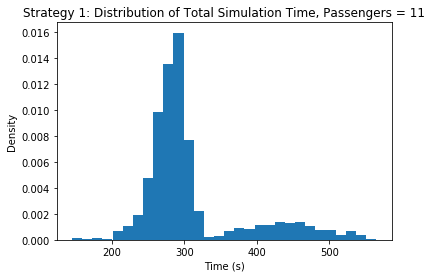

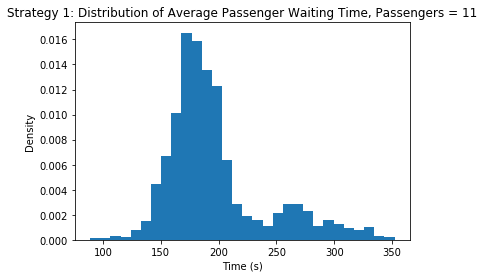

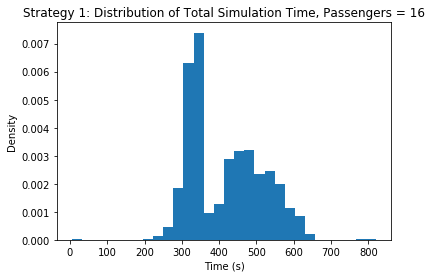

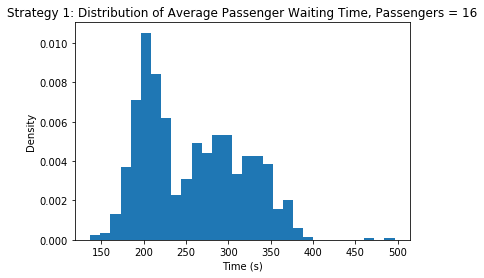

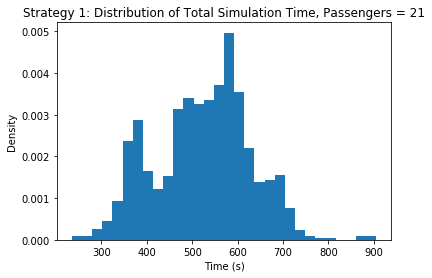

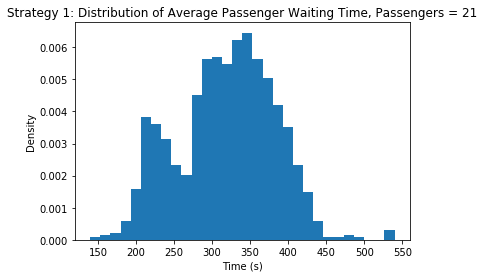

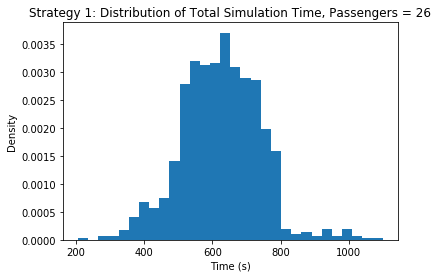

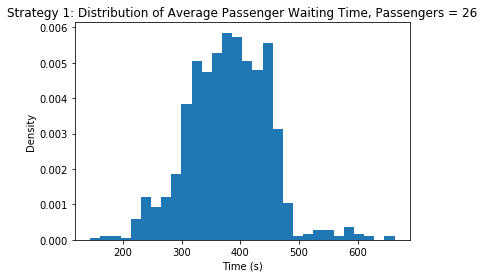

In [6]:
for num_passengers in range(1,30,5):


    total_time_list = []
    waiting_time_list = []


    for i in range(1000):
        Res = Building(20,num_passengers)
        elevator = Elevator(total_floors = 20, curr_floor = random.randint(0,20))
        simulate(Res, elevator)
        total_time_list.append(elevator.total_time)
        waiting_time_list.append(np.mean(elevator.waiting_time))
        
    plt.hist(total_time_list, bins = 30, density = True)
    plt.title("Strategy 1: Distribution of Total Simulation Time, Passengers = %d" %num_passengers)
    plt.ylabel("Density")
    plt.xlabel("Time (s)")
    plt.show()
    
    plt.hist(waiting_time_list, bins = 30, density = True)
    plt.title("Strategy 1: Distribution of Average Passenger Waiting Time, Passengers = %d" %num_passengers)
    plt.ylabel("Density")
    plt.xlabel("Time (s)")
    plt.show()
    

<a name="Strategy-2"></a>
### Strategy 2

### Building Class

In [7]:
# We initialized the building with three parameters
class Building2():
    def __init__(self, total_num_floors = None, num_people = None ): 
        self.total_num_floors = total_num_floors
        self.num_people = num_people
        self.passengers = []
        self.callingFrom = []
        
        # Initialize the passengers so that they are at their starting floor.
        self.floor = []
        for i in range(total_num_floors):
            self.floor.append([])
        
        self.createPeople()
        for person in self.passengers:
            self.floor[person.startFrom].append(person)
        self.callElevator()
    
    
    # Here we created a method that will create people within the building
    def createPeople(self):
        for i in range(self.num_people):
            randomNumbers = random.sample(range(0, self.total_num_floors), 2) # Here we use random sample as it helps us get two unique numbers  
            self.passengers.append(Person2(randomNumbers[0],randomNumbers[1])) # Here we create new objects of the Person (With random walks). 

    def callElevator(self):
        """
        We're getting all the floor destinations at once
        """
        for person in self.passengers:
            self.callingFrom.append(person.call())
        return self.callingFrom

### Person Class

In [8]:
# Here is a short person class.         
class Person2():
    def __init__(self, endingIn = None, startFrom = None):
        self.startFrom = startFrom
        self.endingIn = endingIn
        self.direction = None # Variable 
 

        # inside the elevator 
        # How long waited 

    def call(self):
        """
        Method that calls the elevator
        startFrom -> floor the passenger is located on
        endingIn -> passenger's destination
        """
        # if the floor the passenger wants to go to >
        # than the current floor, the elevator goes up
        # else, elevator goes down
        if self.startFrom > self.endingIn:
            self.direction = 'Down'
        if self.startFrom < self.endingIn:
            self.direction = 'Up'

        return (self.startFrom, self.direction) # returns floor and direction



    def getIn(self,elevator,building):
        """
        Method for the passenger getting into the elevator
        """
        if elevator.num_passenger < elevator.total_capacity:
            elevator.num_passenger += 1
            # Get a person inside the elevator
            elevator.total_time += elevator.time['Stop']
            elevator.destination.append(self.endingIn) # Press the button
            if self.startFrom in elevator.queue[self.direction]:
                elevator.queue[self.direction].remove(self.startFrom)
            # Go out of the floor
            building.floor[self.startFrom].remove(self)
            # Get into the building
            elevator.passenger.append(self)

            
    def getOff(self, elevator):
        """
        Method for the passenger getting out of the elevator
        """

        if elevator.curr_floor == self.endingIn:
            elevator.num_passenger -= 1
            elevator.total_time += elevator.time['Stop']
            elevator.destination.remove(self.endingIn)
            self.endingIn = None
            elevator.passenger.remove(self)
            elevator.waiting_time.append(elevator.total_time)

### Elevator Class

In [9]:
class Elevator2():

    def __init__(self, total_floors = 20, total_capacity = 6):
        """

        """
    
        self.total_capacity = total_capacity # Maximum number of people in the elevator
        self.num_passenger = 0 # The number of people in the elevator at a given time
        self.curr_floor = random.randint(0,total_floors) # randomizes elevator's starting floor
        self.direction = 'Stop'
        self.destination = [] # Passenger destinations.
        self.goto = None # set the next destination
        self.total_time = 0
        self.time = {'Move': 5, 'Stop': 4} # Time for performing each action. Moving is 5s/floor, Stopping is 4s/person going in or out.
        self.queue = {'Up':[],'Down':[]} # Store the floors that called the elevator and the direction.
        self.total_floors = total_floors # This should be changed to the building
        self.passenger = []
        self.waiting_time = []


    def run(self,building):
        # Find all the calls first
        self.call(building)
        while self.num_passenger>0 or len(self.queue['Up'])>0 or len(self.queue['Down'])>0:
            self.decide()
            self.curr_floor = self.goto
            if self.curr_floor in self.destination:
                for person in self.passenger:
                    person.getOff(self)
            if self.curr_floor in set(self.queue['Up']).union(set(self.queue['Down'])):
                for person in building.floor[self.curr_floor]:
                    person.getIn(self,building)
    
    def call(self, building):
        """
        Takes all the destinations and directions of each passenger and stores it in a dictionary
        """
        for x in building.callingFrom:
            from_floor = x[0]
            direction = x[1]

            if direction == 'Up':
                self.queue['Up'].append(from_floor)
            if direction == 'Down':
                self.queue['Down'].append(from_floor)


    def future_stops(self):
        """
        Return a list of future stops given current direction and floor.
        """

        if self.direction == 'Up':
            stops = [x for x in self.queue['Up'] if x > self.curr_floor]
        if self.direction == 'Down':
            stops = [x for x in self.queue['Down'] if x < self.curr_floor]
        return stops



    def decide(self):
        """
        Method for the elevator do decide whether it's moving up or down
        """
        # The initial scenario
        if self.num_passenger == 0:
            self.direction = 'Stop'

        # the if statement below instructs the elevator to go to the closest floor that passenger is calling
        # floor_list_up - list containing the floors where people are going up
        # floor_list_down - list containing the floors where people are going down
        # closest_flr_up - closest floor in the up queue
        # closest_flr_down - closest floor in the down queue
        if self.direction == 'Stop':
            if self.queue['Up']:
                floor_list_up = list(self.queue['Up'])
                differences_up = [abs(x - self.curr_floor) for x in floor_list_up]
                closest_flr_up = min(differences_up)   
            else:
                closest_flr_up = 1000
           
            if self.queue['Down']:
                floor_list_down = list(self.queue['Down'])
                differences_down = [abs(x - self.curr_floor) for x in floor_list_down]
                closest_flr_down = min(differences_down)   
                
            else:
                closest_flr_down=1000

            if closest_flr_up <= closest_flr_down:
                self.goto = floor_list_up[differences_up.index(closest_flr_up)]
                self.total_time += (abs(self.goto - self.curr_floor) * self.time['Move'])
                self.direction = 'Up'
                return
            else:
                self.goto = floor_list_down[differences_down.index(closest_flr_down)]
                self.total_time += (abs(self.goto - self.curr_floor) * self.time['Move'])
                self.direction = 'Down'
                return

        # If the elevator is moving up, then it does not change direction unless no one wants to move up anymore.
        if self.direction == 'Up':

            future_stop = self.future_stops()
            future_destination = [x for x in self.destination if x >= self.curr_floor]
            self.future_stop_and_dest = future_stop+future_destination # concatentate future_stop and future_destination
            if self.future_stop_and_dest: # go to the closest floor among these
                self.goto = sorted(self.future_stop_and_dest)[0] #nearest stop in [future_stop,future_dest]
                self.total_time += (abs(self.goto - self.curr_floor) * self.time['Move'])
                return
            else:
                self.direction = 'Down'
                return

        # else, the elevator is moving down and does not change direction unless no one wants to move down anymore.
        if self.direction == 'Down':
            future_stop = self.future_stops()
            future_destination = [x for x in self.destination if x <= self.curr_floor]
            self.future_stop_and_dest = future_stop+future_destination
            if self.future_stop_and_dest: # go to the closest floor among these
                self.goto = sorted(self.future_stop_and_dest)[0] #nearest stop in [future_stop,future_dest]
                self.total_time += (abs(self.goto - self.curr_floor) * self.time['Move'])
                return
            else:
                self.direction = 'Up'
                return

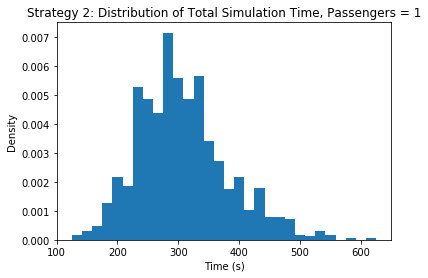

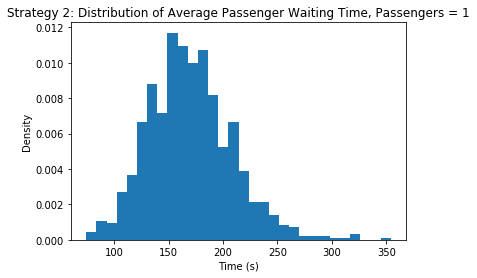

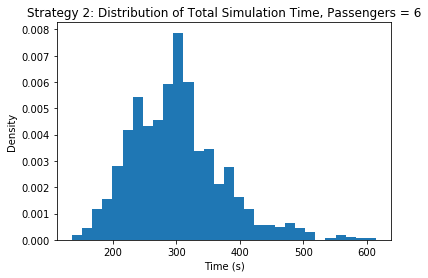

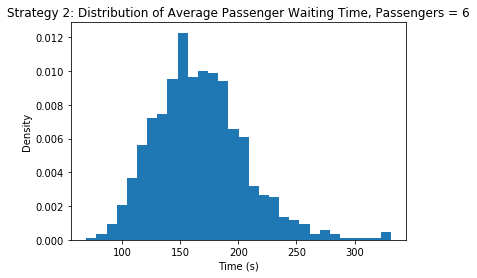

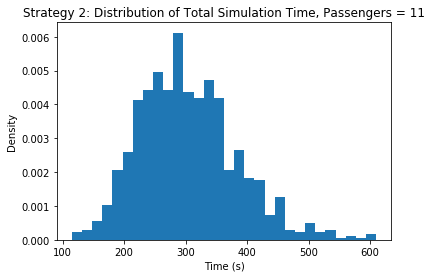

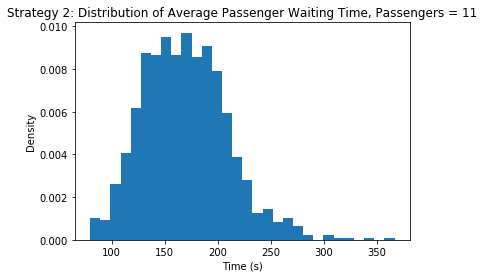

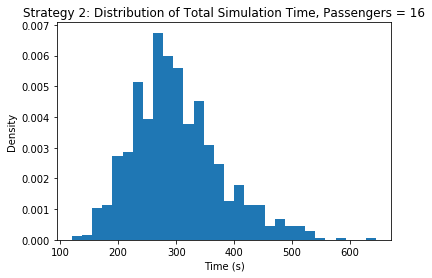

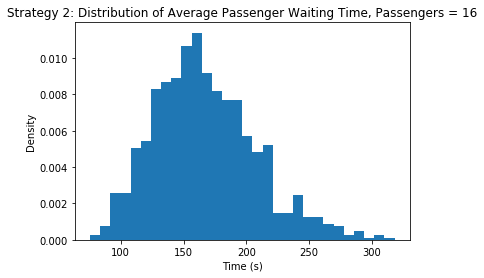

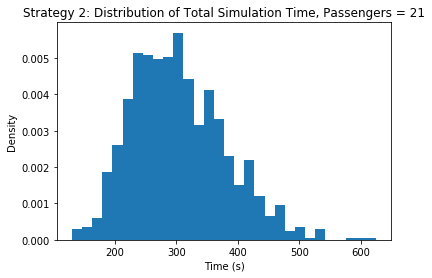

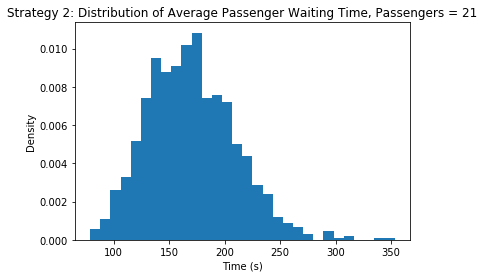

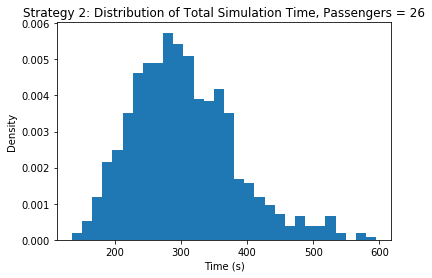

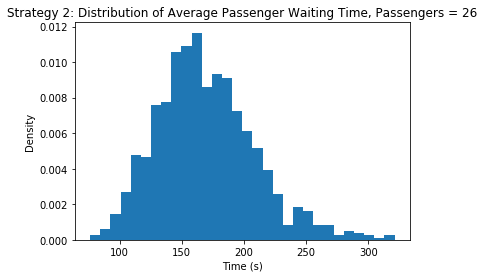

<Figure size 432x288 with 0 Axes>

In [12]:
for num_passengers in range(1,30,5):


    total_time_list = []
    waiting_time_list = []


    for i in range(1000):
        Res2 = Building2(20,5)
        ele2 = Elevator2()
        ele2.run(Res2)
        total_time_list.append(ele2.total_time)
        waiting_time_list.append(np.mean(ele2.waiting_time))
        
    plt.hist(total_time_list, bins = 30, density = True)
    plt.title("Strategy 2: Distribution of Total Simulation Time, Passengers = %d" %num_passengers)
    plt.ylabel("Density")
    plt.xlabel("Time (s)")
    plt.show()
    
    plt.hist(waiting_time_list, bins = 30, density = True)
    plt.title("Strategy 2: Distribution of Average Passenger Waiting Time, Passengers = %d" %num_passengers)
    plt.ylabel("Density")
    plt.xlabel("Time (s)")
    plt.show()
    plt.savefig('Fig.1.png')
    

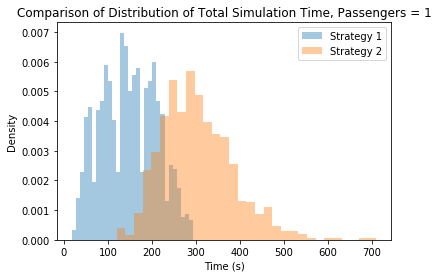

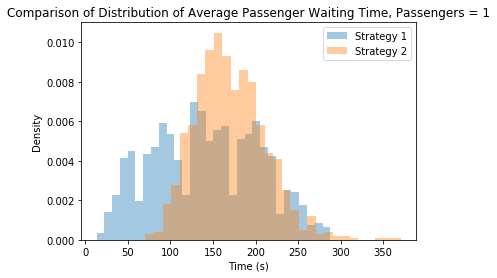

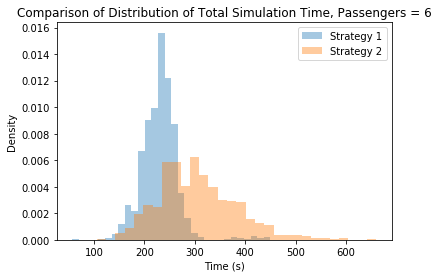

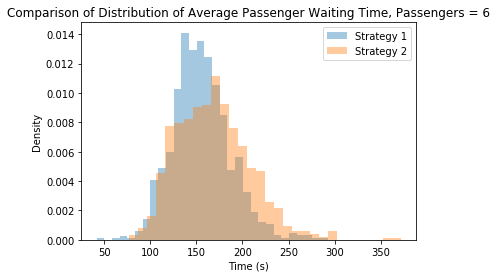

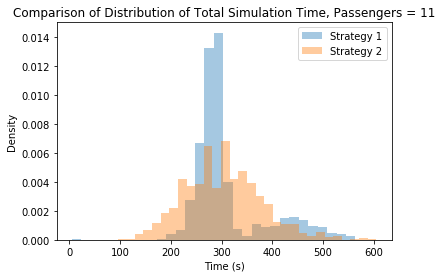

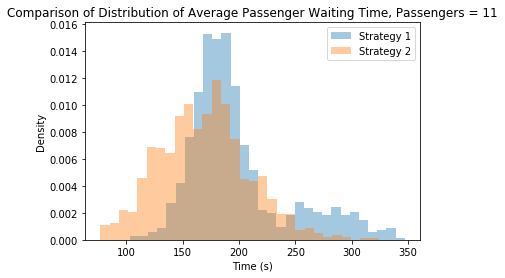

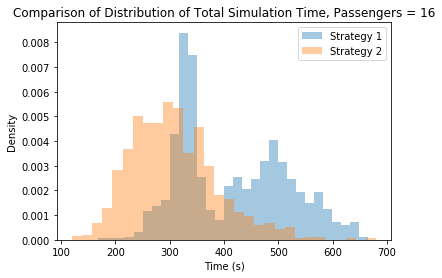

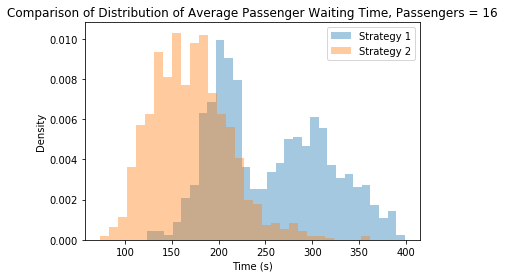

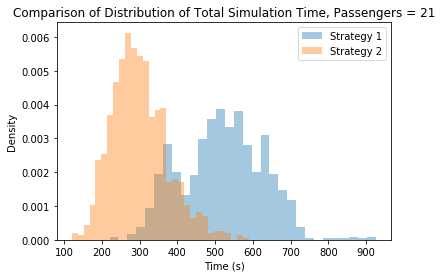

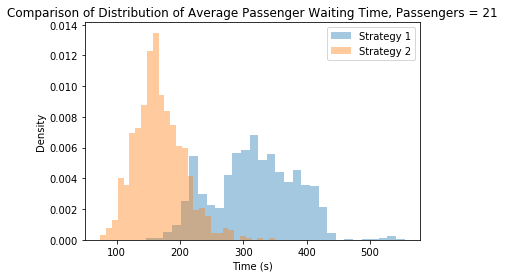

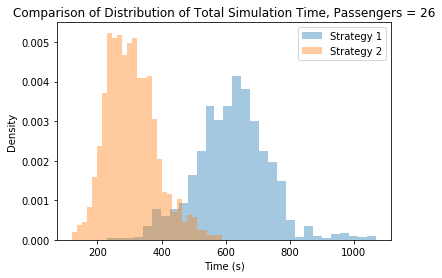

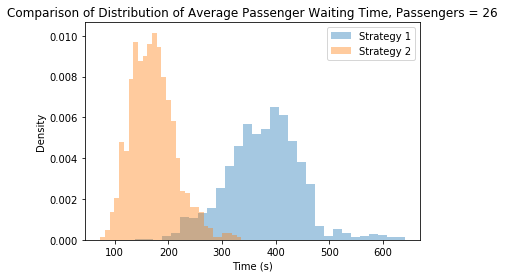

<Figure size 432x288 with 0 Axes>

In [13]:
for num_passengers in range(1,30,5):


    total_time_list = []
    waiting_time_list = []
    
    total_time_list2 = []
    waiting_time_list2 = []


    for i in range(1000):
        Res = Building(20,num_passengers)
        elevator = Elevator(total_floors = 20, curr_floor = random.randint(0,20))
        simulate(Res, elevator)
        total_time_list.append(elevator.total_time)
        waiting_time_list.append(np.mean(elevator.waiting_time))
        
    for i in range(1000):
        Res2 = Building2(20,5)
        ele2 = Elevator2()
        ele2.run(Res2)
        total_time_list2.append(ele2.total_time)
        waiting_time_list2.append(np.mean(ele2.waiting_time))
        
    plt.hist(total_time_list, bins = 30, density = True,alpha=0.4,label='Strategy 1')
    plt.hist(total_time_list2, bins = 30, density = True,alpha=0.4,label='Strategy 2')
    plt.title("Comparison of Distribution of Total Simulation Time, Passengers = %d" %num_passengers)
    plt.ylabel("Density")
    plt.xlabel("Time (s)")
    plt.legend()
    plt.show()
    
    plt.hist(waiting_time_list, bins = 30, density = True,alpha=0.4,label='Strategy 1')
    plt.hist(waiting_time_list2, bins = 30, density = True,alpha=0.4,label='Strategy 2')
    plt.title("Comparison of Distribution of Average Passenger Waiting Time, Passengers = %d" %num_passengers)
    plt.ylabel("Density")
    plt.xlabel("Time (s)")
    plt.legend()
    plt.show()
    plt.savefig('Fig.2.png')